In [499]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# split the data into train and test
from sklearn.model_selection import train_test_split

### Starting from the working dataset

In [500]:
wdf = pd.read_csv('test.csv')
wdf.head()

,Job_type,Remote_work,Coding_as_hobby,Education,Certifications,Job_title,Company_size,Country,Age,Gender,Trans,Sexual_orientation,Ethnicity,Physical_disability,Mental_disability,Work_experience,Coding_experience,Annual_salary
0,"Employed, full-time",Fully remote,I donâ€™t code outside of work,"Bachelorâ€™s degree (B.A., B.S., B.Eng., etc.)",NaN,"Developer, full-stack",100 to 499 employees,Israel,35-44 years old,Man,No,Straight / Heterosexual,White,None of the above,None of the above,NaN,17,215232.0
1,"Employed, full-time","Hybrid (some remote, some in-person)",I donâ€™t code outside of work,"Masterâ€™s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,"Developer, back-end",I donâ€™t know,Netherlands,25-34 years old,Woman,No,Prefer to self-describe:,European,"Or, in your own words:","Or, in your own words:",6.0,6,49056.0
2,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelorâ€™s degree (B.A., B.S., B.Eng., etc.)",Udemy;Codecademy,"Developer, full-stack",2 to 9 employees,Czech Republic,25-34 years old,Man,No,Bisexual,European,None of the above,"I have a mood or emotional disorder (e.g., dep...",NaN,4,19224.0
3,"Employed, full-time",Fully remote,Hobby,"Masterâ€™s degree (M.A., M.S., M.Eng., MBA, etc.)",Coursera;Pluralsight,"Engineer, data","1,000 to 4,999 employees",Austria,25-34 years old,Woman,No,Straight / Heterosexual,European,None of the above,None of the above,NaN,10,202623.0
4,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Contribute to open-source projects,"Masterâ€™s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,"Developer, desktop or enterprise applications;...","10,000 or more employees",United States of America,35-44 years old,Man,No,Straight / Heterosexual,Prefer not to say,None of the above,None of the above,14.0,14,130000.0


- Education column

In [501]:
# before processing
wdf["Education"].unique()

array(['Bachelorâ€™s degree (B.A., B.S., B.Eng., etc.)',
       'Masterâ€™s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Some college/university study without earning a degree',
       'Something else', 'Associate degree (A.A., A.S., etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Professional degree (JD, MD, etc.)', nan,
       'Primary/elementary school'], dtype=object)

In [502]:
wdf['Education'] = wdf['Education'].str.replace('â€™', '\'')

# function from https://www.kaggle.com/code/soheiltehranipour/stackoverflow-2022-salary-prediction
def clean_education(x):
    if pd.isna(x):
        return x
    if 'Bachelor\'s degree' in x:
        return 'Bachelor\'s degree'
    if 'Master\'s degree' in x:
        return 'Master\'s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelor\'s'

wdf['Education'] = wdf['Education'].apply(clean_education)


In [503]:
# after processing
wdf["Education"].unique()

array(["Bachelor's degree", "Master's degree", "Less than a Bachelor's",
       'Post grad', nan], dtype=object)

- Remote Work

In [504]:
# before processing
wdf['Remote_work'].unique()

array(['Fully remote', 'Hybrid (some remote, some in-person)',
       'Full in-person', nan], dtype=object)

In [505]:
wdf['Remote_work'] = wdf['Remote_work'].map(lambda x: x.replace('Fully remote', 'remote').replace('Hybrid (some remote, some in-person)', 'hybrid').replace('Full in-person', 'in-person') if isinstance(x, str) else x)
wdf.dropna(subset=['Remote_work'], inplace=True)

In [506]:
# after processing
wdf['Remote_work'].unique()

array(['remote', 'hybrid', 'in-person'], dtype=object)

- Coding as hobby:

In [507]:
# before processing
wdf['Coding_as_hobby'].unique()

array(['I donâ€™t code outside of work', 'Hobby',
       'Hobby;Contribute to open-source projects',
       'Hobby;Contribute to open-source projects;Freelance/contract work',
       'Hobby;Freelance/contract work',
       'Contribute to open-source projects',
       'Hobby;Contribute to open-source projects;Bootstrapping a business',
       'Hobby;Bootstrapping a business',
       'Hobby;Bootstrapping a business;Freelance/contract work',
       'Hobby;Freelance/contract work;Other (please specify):',
       'Contribute to open-source projects;Bootstrapping a business',
       'Bootstrapping a business', 'Freelance/contract work',
       'Other (please specify):',
       'Contribute to open-source projects;Freelance/contract work',
       'Contribute to open-source projects;Bootstrapping a business;Freelance/contract work',
       'Hobby;Contribute to open-source projects;Bootstrapping a business;Freelance/contract work',
       'Hobby;Other (please specify):',
       'Bootstrapping a 

In [508]:
def hobbyfinder(value):
    if 'hobby' in str(value.lower()):
        return 'yes'
    else:
        return 'no'

wdf['Coding_as_hobby'] = wdf['Coding_as_hobby'].astype(str).apply(hobbyfinder)

In [509]:
# after processing
wdf['Coding_as_hobby'].unique()

array(['no', 'yes'], dtype=object)

- Certifications (Note: actually these values are not certification number, there are just famous platforms. Hence better to filter like 'Yes'/'No'):

In [510]:
wdf['Certifications'].unique()

array([nan, 'Udemy;Codecademy', 'Coursera;Pluralsight', 'Other',
       'Codecademy', 'Udemy', 'Coursera;Udemy;edX;Udacity',
       'Coursera;Udemy;edX', 'Codecademy;Pluralsight', 'Pluralsight',
       'Coursera;Udemy;Udacity', 'Coursera;Codecademy;Pluralsight;edX',
       'Coursera', 'Codecademy;Other', 'Coursera;Udemy',
       'Udemy;Codecademy;Udacity;Other', 'Coursera;Udemy;Pluralsight',
       'Udemy;Pluralsight;Other', 'Codecademy;Pluralsight;Other',
       'Udemy;Skillsoft', 'Udemy;Codecademy;Pluralsight',
       'Coursera;Udemy;Codecademy', 'Udemy;Udacity',
       'Coursera;Pluralsight;Udacity', 'Udemy;Pluralsight',
       'Pluralsight;edX', 'Coursera;Other',
       'Coursera;Udemy;Codecademy;edX', 'Coursera;Codecademy;edX',
       'Udacity', 'Coursera;Udacity', 'Udemy;Codecademy;edX',
       'Udemy;Other', 'Coursera;Codecademy;Pluralsight',
       'Udemy;Codecademy;Pluralsight;Udacity', 'Coursera;Udemy;Other',
       'Coursera;Udemy;Pluralsight;Udacity',
       'Coursera;Udemy

In [511]:
def certification_status(x):
    if pd.isnull(x):
        return 'no'
    else:
        return 'yes'

wdf['Certifications'] = wdf['Certifications'].apply(certification_status)

In [512]:
# after processing
wdf['Certifications'].unique()

array(['no', 'yes'], dtype=object)

- Physical dissabilities (Note: for physical only 2547 responses, hence 'yes'/'no' binary system applied again + 'Prefer not to say')

In [513]:
# before processing
wdf['Physical_disability'].unique()

array(['None of the above', 'Or, in your own words:', nan,
       'I am blind / have difficulty seeing', 'Prefer not to say',
       'I am unable to / find it difficult to type',
       'I am deaf / hard of hearing',
       'I am unable to / find it difficult to walk or stand without assistance',
       'Or, in your own words:;I am deaf / hard of hearing;I am blind / have difficulty seeing',
       'I am blind / have difficulty seeing;I am unable to / find it difficult to walk or stand without assistance',
       'I am deaf / hard of hearing;I am blind / have difficulty seeing;I am unable to / find it difficult to type;I am unable to / find it difficult to walk or stand without assistance',
       'I am blind / have difficulty seeing;I am unable to / find it difficult to type',
       'I am deaf / hard of hearing;I am blind / have difficulty seeing',
       'Or, in your own words:;I am deaf / hard of hearing',
       'Or, in your own words:;I am blind / have difficulty seeing',
       

In [514]:
# number of rows with 'Prefer not to say' VS total number of rows
print(wdf['Physical_disability'].value_counts().sum())
print(wdf[wdf['Physical_disability'] == 'Prefer not to say'].value_counts().sum())

10987
90


In [515]:
def physical_disability(x):
    if pd.isnull(x) or x == 'None of the above':
        return 'no' # imputing missing values as 'no' since it is the most common
    if x == 'Prefer not to say':
        return x
    else:
        return 'yes'

wdf['Physical_disability'] = wdf['Physical_disability'].apply(physical_disability)

In [516]:
# after processing
wdf['Physical_disability'].unique()

array(['no', 'yes', 'Prefer not to say'], dtype=object)

- Mental dissability (Note: here we have 16,163 responses, hence we should distinguish among dissabilities):

In [517]:
# before processing
wdf['Mental_disability'].unique()

array(['None of the above', 'Or, in your own words:',
       'I have a mood or emotional disorder (e.g., depression, bipolar disorder, etc.)',
       'I have an anxiety disorder', 'Prefer not to say',
       'I have a mood or emotional disorder (e.g., depression, bipolar disorder, etc.);I have an anxiety disorder',
       nan,
       "I have a mood or emotional disorder (e.g., depression, bipolar disorder, etc.);I have autism / an autism spectrum disorder (e.g. Asperger's, etc.)",
       "I have a concentration and/or memory disorder (e.g., ADHD, etc.);I have autism / an autism spectrum disorder (e.g. Asperger's, etc.)",
       'Or, in your own words:;I have a concentration and/or memory disorder (e.g., ADHD, etc.)',
       "I have a mood or emotional disorder (e.g., depression, bipolar disorder, etc.);I have an anxiety disorder;I have a concentration and/or memory disorder (e.g., ADHD, etc.);I have autism / an autism spectrum disorder (e.g. Asperger's, etc.)",
       'I have a mood or

In [518]:
def simplify_mental_disability(x):
    if pd.isnull(x) or x == 'None of the above':
        return 'No'
    categories = {
        'I have a concentration and/or memory disorder': 'Memory_disorder',
        'I have an anxiety disorder': 'Anxiety_disorder',
        'I have a mood or emotional disorder (e.g., depression, bipolar disorder, etc.)': 'Mood_disorder',
        "I have autism / an autism spectrum disorder (e.g. Asperger's, etc.)": 'Autism',
        'I have learning differences (e.g., Dyslexic, Dyslexia, etc.)': 'Learning_difficulties'
    }
    matches = [cat for keyword, cat in categories.items() if keyword in x]
    if len(matches) > 1:
        return 'Various_disabilities'
    elif len(matches) == 1:
        return matches[0]
    else:
        return 'Others'

wdf['Mental_disability'] = wdf['Mental_disability'].apply(simplify_mental_disability)


In [519]:
# after processing
wdf['Mental_disability'].value_counts()

No                       8363
Various_disabilities      976
Memory_disorder           525
Others                    443
Anxiety_disorder          432
Mood_disorder             341
Learning_difficulties     172
Autism                    155
Name: Mental_disability, dtype: int64

- Company Size

In [520]:
wdf['Company_size'].unique()

array(['100 to 499 employees', 'I donâ€™t know', '2 to 9 employees',
       '1,000 to 4,999 employees', '10,000 or more employees',
       '20 to 99 employees', '10 to 19 employees', '500 to 999 employees',
       'Just me - I am a freelancer, sole proprietor, etc.',
       '5,000 to 9,999 employees', nan], dtype=object)

In [521]:
# Preprocess OrgSize column, soruce: https://www.kaggle.com/code/do1likethis/which-devs-get-paid-more-and-why#Modeling:-how-well-can-we-predict-earning?-What-variables-matter-most?

wdf['Company_size'] = wdf['Company_size'].fillna("None").replace({"10,000 or more employees": "XL",
                                      "20 to 99 employees": "S",
                                      "100 to 499 employees": "M",
                                      "1,000 to 4,999 employees": "L",
                                      "5,000 to 9,999 employees": "XL",
                                      "2 to 9 employees": "XS",
                                      "10 to 19 employees": "XS",
                                      "500 to 999 employees": "M",
                                      "Just me - I am a freelancer, sole proprietor, etc.": "XS",
                                      "I donâ€™t know": "None",
                                      "I prefer not to answer": "None"})

wdf['Company_size'] = wdf['Company_size'].replace('None', np.nan)

In [522]:
# after processing
wdf['Company_size'].unique()

array(['M', nan, 'XS', 'L', 'XL', 'S'], dtype=object)

- Age (Note: Only check NAN)

In [523]:
wdf['Age'].unique()

array(['35-44 years old', '25-34 years old', '18-24 years old',
       '45-54 years old', '55-64 years old', '65 years or older',
       'Prefer not to say', nan, 'Under 18 years old'], dtype=object)

- Job Type (Note: we need to simplify it since there are mixed and confusing values):

In [524]:
wdf.Job_type.unique()

array(['Employed, full-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Independent contractor, freelancer, or self-employed',
       'Employed, part-time',
       'Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time;Employed, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Independent contractor, freelancer, or self-employed;Retired'],
      dtype=object)

In [525]:
def simplify_job_type(job_type):
    if pd.isnull(job_type):
        return job_type
    job_list = job_type.split(';')
    
    if len(job_list) > 1:
        return 'Other'
    elif 'Employed, full-time' in job_list:
        return 'Full-time employed'
    elif 'Employed, part-time' in job_list:
        return 'Part-time employed'
    elif 'Retired' in job_list:
        return 'Retired'
    else:
        return 'Independent contractor / Freelancer / Self-employed'

wdf['Job_type'] = wdf['Job_type'].apply(simplify_job_type)


In [526]:
# after processing
wdf.Job_type.unique()

array(['Full-time employed', 'Other',
       'Independent contractor / Freelancer / Self-employed',
       'Part-time employed'], dtype=object)

- Country (Note: Here we will shorten the longer country names for simplicity)

In [527]:
def shorten_country_name(name):
    shorten_dict = {
        'United Kingdom of Great Britain and Northern Ireland': 'UK & Northern Ireland',
        'United States of America': 'USA',
        'Bosnia and Herzegovina': 'Bosnia-Herz.',
        'Iran, Islamic Republic of...': 'Iran',
        'The former Yugoslav Republic of Macedonia': 'North Macedonia',
        'United Republic of Tanzania': 'Tanzania',
        'Venezuela, Bolivarian Republic of...': 'Venezuela',
        "Lao People's Democratic Republic": 'Laos',
        'Democratic Republic of the Congo': 'DR Congo',
        'Congo, Republic of the...': 'Republic of Congo',
        'Libyan Arab Jamahiriya': 'Libya',
        'Hong Kong (S.A.R.)': 'Hong Kong',
    }
    
    return shorten_dict.get(name, name)

wdf['Country'] = wdf['Country'].apply(shorten_country_name)


In [528]:
# after processing
wdf['Country'].unique()

array(['Israel', 'Netherlands', 'Czech Republic', 'Austria', 'USA',
       'Poland', 'Norway', 'Taiwan', 'France', 'Spain', 'Uruguay',
       'Romania', 'Italy', 'UK & Northern Ireland', 'Belgium', 'Germany',
       'Ireland', 'Portugal', 'Saudi Arabia', 'Brazil', 'Canada',
       'Sweden', 'Kenya', 'Montenegro', 'Switzerland', 'India',
       'Argentina', 'Australia', 'Finland', 'Egypt', 'Denmark',
       'Thailand', 'Pakistan', 'Nepal', 'Hungary', 'Indonesia',
       'South Africa', 'Croatia', 'Bosnia-Herz.', 'Lithuania',
       'Costa Rica', 'Serbia', 'Greece', 'Mauritius', 'Bangladesh',
       'Mexico', 'Estonia', 'Philippines', 'Slovakia', 'Turkey',
       'Slovenia', 'Ecuador', 'Ukraine', 'Japan', 'New Zealand',
       'Morocco', 'Peru', 'China', 'Nicaragua', 'Colombia', 'Lebanon',
       'Malaysia', 'Guatemala', 'Chile', 'Russian Federation',
       'Azerbaijan', 'Viet Nam', 'Tunisia', 'Sri Lanka', 'Nigeria',
       'Hong Kong', 'Uzbekistan', 'Armenia', 'Bulgaria', 'Iran',
     

- Ethnicity (Note: there are a lot of unique values due to multiracial options, this needs to be simplified)

In [529]:
# before processing
wdf.Ethnicity.value_counts()

White                                                                     2827
European                                                                  2557
White;European                                                            1506
Indian                                                                     557
Asian                                                                      339
                                                                          ... 
White;North American;Hispanic or Latino/a;Multiracial                        1
Middle Eastern;African;Black                                                 1
European;Indigenous (such as Native American or Indigenous Australian)       1
Caribbean;Central American;Hispanic or Latino/a                              1
White;Middle Eastern;Biracial                                                1
Name: Ethnicity, Length: 341, dtype: int64

In [530]:
def simplify_ethnicity1(ethnicity):
    if pd.isna(ethnicity):
        return ethnicity
    if 'Or, in your own words:' in ethnicity:
        return 'Other'
    if 'Prefer not to say' in ethnicity:
        return 'Prefer not to say'
    
    ethnicities = ethnicity.split(';')
    if len(ethnicities) > 2:
        return 'Multiracial'
    elif len(ethnicities) == 2:
        return f"{ethnicities[0]};{ethnicities[1]}"
    else:
        return ethnicities[0]

wdf['Ethnicity'] = wdf['Ethnicity'].apply(simplify_ethnicity1)

In [531]:
def simplify_ethnicity2(ethnicity):
    if pd.isnull(ethnicity):
        return None
    if 'White' in ethnicity or 'European' in ethnicity:
        return 'White / European'
    if 'Indian' in ethnicity or 'South Asian' in ethnicity:
        return 'Indian / South Asian'
    if 'Asian' in ethnicity:
        return 'Asian'
    if 'Hispanic' in ethnicity or 'Latino' in ethnicity:
        return 'Hispanic or Latino/a'
    if 'Middle Eastern' in ethnicity or 'North African' in ethnicity:
        return 'Middle Eastern / North African'
    if 'African' in ethnicity or 'Black' in ethnicity:
        return 'African / Black'
    if 'North American' in ethnicity or 'Central American' in ethnicity:
        return 'North American / Central American'
    if 'Multiracial' in ethnicity or 'Biracial' in ethnicity:
        return 'Multiracial'
    if "Prefer not to say" in ethnicity or "I don't know" in ethnicity:
        return 'Prefer not to say / I don\'t know'
    return 'Other'

wdf['Ethnicity'] = wdf['Ethnicity'].apply(simplify_ethnicity2)

In [532]:
simplified_ethnicity_percentage = wdf['Ethnicity'].value_counts() / wdf['Ethnicity'].notna().sum() * 100
print(simplified_ethnicity_percentage)

White / European                     66.474399
Indian / South Asian                  7.214482
Asian                                 5.794658
Multiracial                           5.040376
Other                                 4.037625
Hispanic or Latino/a                  3.771408
Middle Eastern / North African        2.342710
Prefer not to say / I don't know      2.316088
African / Black                       2.111989
North American / Central American     0.896264
Name: Ethnicity, dtype: float64


### Gender 

In the Gender column, we encountered values that contain 'Or, in your own words:' along with other gender categories separated by a semicolon. We wanted to make sure that if a value contains 'Or, in your own words:' and other categories, we remove 'Or, in your own words:' and keep the remaining categories. If the value contains only 'Or, in your own words:', we want to consider it as NaN.

To achieve this, we defined a function called `process_values`. This function takes a single value as input and performs the following steps:

1. Check if the input value is None or NaN. If it is, return NaN.
2. Convert the input value to a string.
3. Check if the value contains 'Or, in your own words:'. If it does, split the value by semicolon and remove 'Or, in your own words:' from the list of split values.
4. If the list of split values is empty after removing 'Or, in your own words:', return NaN. Otherwise, join the remaining values with a semicolon and return the result.

Finally, we applied the `process_values` function to the Gender column using the `apply` method.


In [533]:
wdf.Gender.value_counts()

Man                                                                                   10539
Woman                                                                                   513
Prefer not to say                                                                       102
Non-binary, genderqueer, or gender non-conforming                                        96
Man;Non-binary, genderqueer, or gender non-conforming                                    44
Woman;Non-binary, genderqueer, or gender non-conforming                                  28
Or, in your own words:                                                                   19
Man;Or, in your own words:                                                               17
Man;Woman;Non-binary, genderqueer, or gender non-conforming                               3
Or, in your own words:;Non-binary, genderqueer, or gender non-conforming                  1
Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conforming  

In [534]:
wdf.Trans.value_counts()

No                        11036
Prefer not to say           126
Yes                         114
Or, in your own words:       49
Name: Trans, dtype: int64

In [535]:
# Modificar la columna 'Gender' basándose en los valores de la columna 'Trans'
wdf['Gender'] = wdf.apply(lambda row: 'Trans' if row['Trans'] == 'Yes' else row['Gender'], axis=1)

# Eliminar la columna 'Trans'
wdf = wdf.drop('Trans', axis=1)


In [536]:
wdf.Gender.value_counts()

Man                                                                                   10526
Woman                                                                                   476
Trans                                                                                   114
Prefer not to say                                                                        99
Non-binary, genderqueer, or gender non-conforming                                        57
Man;Non-binary, genderqueer, or gender non-conforming                                    39
Or, in your own words:                                                                   18
Man;Or, in your own words:                                                               17
Woman;Non-binary, genderqueer, or gender non-conforming                                  15
Man;Woman;Non-binary, genderqueer, or gender non-conforming                               1
Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conforming  

In [537]:
def process_values(value):
    if value is None or pd.isna(value):
        return float('nan')
    
    value = str(value)
    
    if 'Or, in your own words:' in value:
        split_values = value.split(';')
        split_values = [v.strip() for v in split_values if v.strip() != 'Or, in your own words:']
        if len(split_values) == 0:
            return float('nan')
        else:
            return ';'.join(split_values)
    else:
        return value

# Aplicar la función a la columna
wdf['Gender'] = wdf['Gender'].apply(process_values)


In [538]:
wdf.Gender.value_counts()

Man                                                            10543
Woman                                                            476
Trans                                                            114
Prefer not to say                                                 99
Non-binary, genderqueer, or gender non-conforming                 57
Man;Non-binary, genderqueer, or gender non-conforming             40
Woman;Non-binary, genderqueer, or gender non-conforming           16
Man;Woman;Non-binary, genderqueer, or gender non-conforming        2
Man;Woman                                                          1
Name: Gender, dtype: int64

In [539]:
def categorize_gender(value):
    if isinstance(value, str):  # solo realiza la operación en las cadenas
        if 'Non-binary, genderqueer, or gender non-conforming' in value or 'Man;Woman' in value:
            return 'gender non-conforming'
        else:
            return value
    else:  # si no es una cadena, devuelve el valor tal cual (probablemente NaN)
        return value

wdf['Gender'] = wdf['Gender'].apply(categorize_gender)


In [540]:
wdf.Gender.value_counts()

Man                      10543
Woman                      476
gender non-conforming      116
Trans                      114
Prefer not to say           99
Name: Gender, dtype: int64

### Sexual Orientation Column

1. Created a function called `simplify_sexual_orientation` to simplify the values in the 'Sexual_orientation' column.
2. If the value contains 'Prefer to self-describe', the function returns 'Other'.
3. If the value contains 'Prefer not to say', the function returns 'Prefer not to say'.
4. If the value contains a semicolon (;), indicating multiple values, the function returns 'Other'.
5. If none of the above conditions are met, the function returns the original value.
6. Applied the `simplify_sexual_orientation` function to the 'Sexual_orientation' column using the `apply()` method.


In [541]:
wdf.Sexual_orientation.value_counts()

Straight / Heterosexual                                      9520
Prefer not to say                                             438
Bisexual                                                      390
Gay or Lesbian                                                253
Prefer to self-describe:                                      111
Queer                                                          71
Bisexual;Queer                                                 50
Bisexual;Straight / Heterosexual                               50
Straight / Heterosexual;Queer                                  25
Straight / Heterosexual;Prefer to self-describe:               25
Gay or Lesbian;Queer                                           19
Bisexual;Prefer to self-describe:                               7
Bisexual;Gay or Lesbian                                         6
Bisexual;Gay or Lesbian;Queer                                   6
Bisexual;Prefer to self-describe:;Queer                         5
Prefer to 

In [542]:

def process_values(value, remove_phrase):
    if pd.isnull(value):
        return pd.NA

    value = str(value)

    if remove_phrase in value:
        parts = value.split(';')
        parts = [part for part in parts if part != remove_phrase]
        
        if not parts:
            return pd.NA

        value = ';'.join(parts)
    
    return value

wdf['Sexual_orientation'] = wdf['Sexual_orientation'].apply(lambda x: process_values(x, 'Prefer to self-describe:'))


In [543]:
wdf.Sexual_orientation.value_counts()

Straight / Heterosexual                                  9545
Prefer not to say                                         438
Bisexual                                                  397
Gay or Lesbian                                            254
Queer                                                      74
Bisexual;Queer                                             55
Bisexual;Straight / Heterosexual                           51
Straight / Heterosexual;Queer                              26
Gay or Lesbian;Queer                                       20
Bisexual;Gay or Lesbian                                     7
Bisexual;Gay or Lesbian;Queer                               6
Bisexual;Straight / Heterosexual;Queer                      3
Bisexual;Straight / Heterosexual;Gay or Lesbian;Queer       2
Straight / Heterosexual;Gay or Lesbian                      1
Bisexual;Straight / Heterosexual;Gay or Lesbian             1
Name: Sexual_orientation, dtype: int64

In [544]:
def simplify_sexual_orientation(value):
    if pd.isnull(value):
        return pd.NA

    value = str(value)

    if 'Straight / Heterosexual' in value:
        return 'Straight / Heterosexual'
    elif 'Prefer not to say' in value:
        return 'Prefer not to say'
    elif 'Bisexual' in value:
        return 'Bisexual'
    elif 'Gay or Lesbian' in value:
        return 'Gay or Lesbian'
    elif 'Queer' in value:
        return 'Queer'
    else:
        return 'Other'

wdf['Sexual_orientation'] = wdf['Sexual_orientation'].apply(simplify_sexual_orientation)


In [545]:
# after processing
wdf.Sexual_orientation.value_counts()

Straight / Heterosexual    9629
Bisexual                    465
Prefer not to say           438
Gay or Lesbian              274
Queer                        74
Name: Sexual_orientation, dtype: int64

In [546]:
wdf.head() #falta job title, exp y annual salary

,Job_type,Remote_work,Coding_as_hobby,Education,Certifications,Job_title,Company_size,Country,Age,Gender,Sexual_orientation,Ethnicity,Physical_disability,Mental_disability,Work_experience,Coding_experience,Annual_salary
0,Full-time employed,remote,no,Bachelor's degree,no,"Developer, full-stack",M,Israel,35-44 years old,Man,Straight / Heterosexual,White / European,no,No,NaN,17,215232.0
1,Full-time employed,hybrid,no,Master's degree,no,"Developer, back-end",NaN,Netherlands,25-34 years old,Woman,<NA>,White / European,yes,Others,6.0,6,49056.0
2,Full-time employed,hybrid,yes,Bachelor's degree,yes,"Developer, full-stack",XS,Czech Republic,25-34 years old,Man,Bisexual,White / European,no,Mood_disorder,NaN,4,19224.0
3,Full-time employed,remote,yes,Master's degree,yes,"Engineer, data",L,Austria,25-34 years old,Woman,Straight / Heterosexual,White / European,no,No,NaN,10,202623.0
4,Full-time employed,hybrid,yes,Master's degree,no,"Developer, desktop or enterprise applications;...",XL,USA,35-44 years old,Man,Straight / Heterosexual,Prefer not to say / I don't know,no,No,14.0,14,130000.0


### Experience (Note: here there are a lot of missing values... we might need to impute them)

In [547]:
wdf.Work_experience.head()

0     NaN
1     6.0
2     NaN
3     NaN
4    14.0
Name: Work_experience, dtype: float64

In [548]:
wdf["Work_experience"] = wdf["Work_experience"].round(1)

In [549]:
wdf.head()

,Job_type,Remote_work,Coding_as_hobby,Education,Certifications,Job_title,Company_size,Country,Age,Gender,Sexual_orientation,Ethnicity,Physical_disability,Mental_disability,Work_experience,Coding_experience,Annual_salary
0,Full-time employed,remote,no,Bachelor's degree,no,"Developer, full-stack",M,Israel,35-44 years old,Man,Straight / Heterosexual,White / European,no,No,NaN,17,215232.0
1,Full-time employed,hybrid,no,Master's degree,no,"Developer, back-end",NaN,Netherlands,25-34 years old,Woman,<NA>,White / European,yes,Others,6.0,6,49056.0
2,Full-time employed,hybrid,yes,Bachelor's degree,yes,"Developer, full-stack",XS,Czech Republic,25-34 years old,Man,Bisexual,White / European,no,Mood_disorder,NaN,4,19224.0
3,Full-time employed,remote,yes,Master's degree,yes,"Engineer, data",L,Austria,25-34 years old,Woman,Straight / Heterosexual,White / European,no,No,NaN,10,202623.0
4,Full-time employed,hybrid,yes,Master's degree,no,"Developer, desktop or enterprise applications;...",XL,USA,35-44 years old,Man,Straight / Heterosexual,Prefer not to say / I don't know,no,No,14.0,14,130000.0


In [550]:
wdf.Work_experience.isna().sum()

3331

### Annual Salary Distribution

There are a lot of trolls regarding salary data...

In [551]:
wdf.Annual_salary.min(), wdf.Annual_salary.max()

(4.0, 44790396.0)

Let's see the salaries distribution setting up a top limit in 500,000 $:

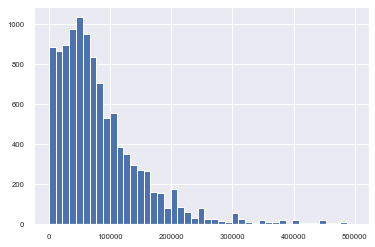

In [552]:
wdf[wdf.Annual_salary < 500000].Annual_salary.hist(bins='scott');

As we can see in the histogram, most values don't go further than 300.000$. Let's start trimming down from 10.000$ till 350.000$.

In [553]:
# Filtra los registros que contienen valores extremos en la columna 'Annual_salary'
lower_limit = 10000 #wdf['Annual_salary'].quantile(0.1)
upper_limit = 350000 #wdf['Annual_salary'].quantile(0.95)
wdf = wdf.loc[wdf['Annual_salary'].between(lower_limit, upper_limit)]

# Restablece el índice del DataFrame después de eliminar los registros
wdf = wdf.reset_index(drop=True)
print(f"Lower Limit: {lower_limit:.2f}, Upper Limit: {upper_limit:.2f}")

Lower Limit: 10000.00, Upper Limit: 350000.00


In [554]:
wdf['Annual_salary'].shape[0]

10001

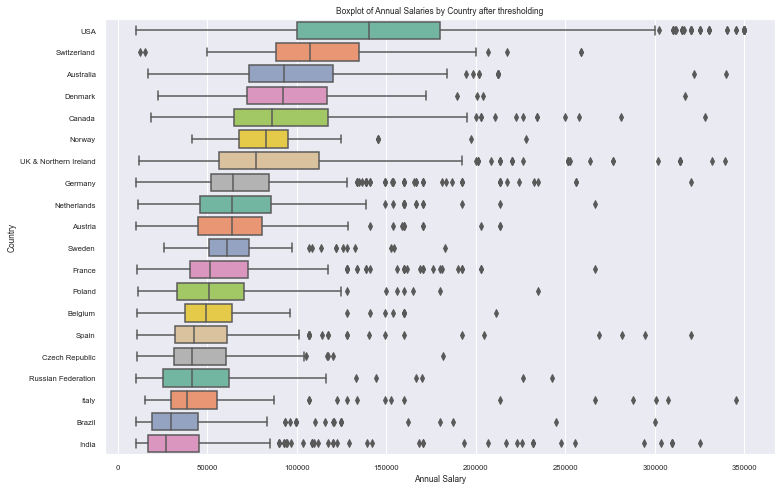

In [555]:
# Get the top 20 countries by frequency
top_20_countries2 = wdf['Country'].value_counts().head(20).index

# Filter the dataset to include only the top 20 countries
filtered_wdf = wdf[wdf['Country'].isin(top_20_countries2)]

# Get the number of cases per country
country_counts = filtered_wdf.groupby('Country')['Annual_salary'].count().reset_index()
country_counts.columns = ['Country', 'Number of cases']

# Merge the number of cases with the filtered_wdf2 dataset
filtered_wdf2 = pd.merge(filtered_wdf, country_counts, on='Country')

# Sort the dataset by the number of values per country
sorted_countries2 = filtered_wdf2.groupby('Country')['Annual_salary'].median().sort_values(ascending=False).index

# Create the boxplot
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(x='Annual_salary', y='Country', data=filtered_wdf, palette='Set2', ax=ax, order=sorted_countries2)
plt.title('Boxplot of Annual Salaries by Country after thresholding')
plt.xlabel('Annual Salary')
plt.ylabel('Country');

Despite salaries now have a normal distribution after applying some scalation, we still see a lot of multivariate outliers on each Country salary distribution.
One of the more robust methods to identify outliers, is the MAD. Hence, we will make a formula to identify the outliers per country and delete them using this method

In [556]:
# Calcular la mediana y el MAD por país
medians_and_mads = wdf.groupby('Country')['Annual_salary'].agg(['median', lambda x: np.median(np.abs(x - x.median()))]).reset_index()
medians_and_mads.columns = ['Country', 'Country_median', 'Country_mad']
# Agregar la mediana y el MAD de cada país al conjunto de datos original
wdf_with_medians_and_mads = pd.merge(wdf, medians_and_mads, on='Country')
wdf_with_medians_and_mads.Annual_salary.isnull().sum()

0

In [557]:
C = 2
scaled_country_mad = 1.4826 * wdf_with_medians_and_mads['Country_mad']
lower_limit = wdf_with_medians_and_mads['Country_median'] - C * scaled_country_mad
upper_limit = wdf_with_medians_and_mads['Country_median'] + C * scaled_country_mad

cleaned_wdf = wdf_with_medians_and_mads[(wdf_with_medians_and_mads['Annual_salary'] >= lower_limit) & (wdf_with_medians_and_mads['Annual_salary'] <= upper_limit)]


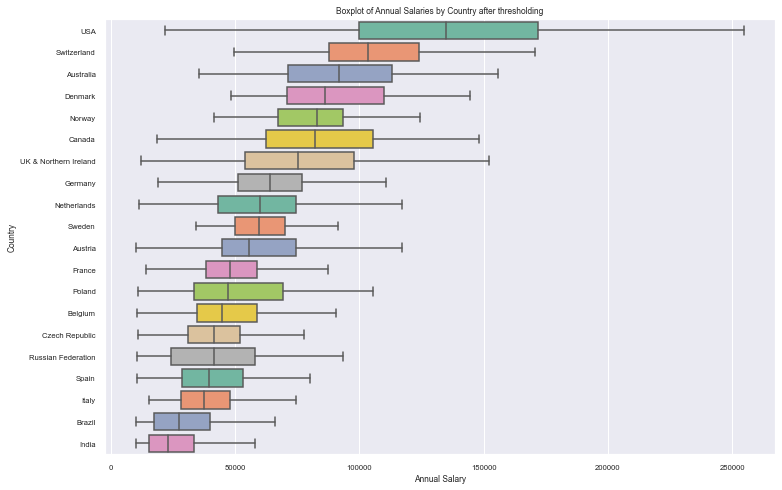

In [558]:
# Get the top 20 countries by frequency
top_20_countries2 = cleaned_wdf['Country'].value_counts().head(20).index

# Filter the dataset to include only the top 20 countries
filtered_wdf = cleaned_wdf[cleaned_wdf['Country'].isin(top_20_countries2)]

# Get the number of cases per country
country_counts = filtered_wdf.groupby('Country')['Annual_salary'].count().reset_index()
country_counts.columns = ['Country', 'Number of cases']

# Merge the number of cases with the filtered_wdf2 dataset
filtered_wdf2 = pd.merge(filtered_wdf, country_counts, on='Country')

# Sort the dataset by the number of values per country
sorted_countries2 = filtered_wdf2.groupby('Country')['Annual_salary'].median().sort_values(ascending=False).index

# Create the boxplot
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(x='Annual_salary', y='Country', data=filtered_wdf, palette='Set2', ax=ax, order=sorted_countries2)
plt.title('Boxplot of Annual Salaries by Country after thresholding')
plt.xlabel('Annual Salary')
plt.ylabel('Country');

In [559]:
cleaned_wdf.shape, wdf.shape

((9006, 19), (10001, 17))

In [560]:
wdf = cleaned_wdf
wdf.drop(['Country_median', 'Country_mad'], axis=1, inplace=True)
wdf.head()

C:\Users\fenan\AppData\Local\Temp\ipykernel_13128\841836538.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wdf.drop(['Country_median', 'Country_mad'], axis=1, inplace=True)


,Job_type,Remote_work,Coding_as_hobby,Education,Certifications,Job_title,Company_size,Country,Age,Gender,Sexual_orientation,Ethnicity,Physical_disability,Mental_disability,Work_experience,Coding_experience,Annual_salary
1,Full-time employed,hybrid,yes,Bachelor's degree,no,"Developer, back-end",XL,Israel,25-34 years old,Woman,Gay or Lesbian,Other,no,Various_disabilities,10.0,10,197292.0
2,Full-time employed,hybrid,yes,Less than a Bachelor's,no,"Developer, back-end;DevOps specialist;Develope...",S,Israel,35-44 years old,Man,Straight / Heterosexual,White / European,no,No,16.0,23,157836.0
3,Full-time employed,hybrid,yes,Less than a Bachelor's,no,"Developer, embedded applications or devices",L,Israel,25-34 years old,Man,Straight / Heterosexual,White / European,no,No,10.0,10,118380.0
4,Full-time employed,hybrid,no,Bachelor's degree,no,"Developer, back-end;Cloud infrastructure engineer",L,Israel,45-54 years old,Man,Straight / Heterosexual,Middle Eastern / North African,no,No,23.0,23,121968.0
5,Full-time employed,hybrid,yes,Bachelor's degree,yes,"Developer, front-end;Developer, full-stack",M,Israel,35-44 years old,Man,Straight / Heterosexual,White / European,no,No,NaN,7,136308.0


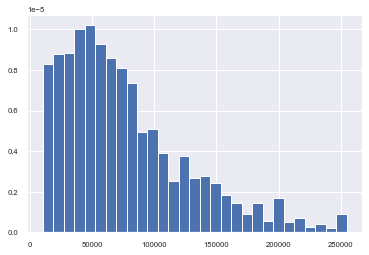

In [561]:
wdf[(wdf.Annual_salary < wdf.Annual_salary.max()) & (wdf.Annual_salary > wdf.Annual_salary.min())].Annual_salary.hist(bins='scott', density=True);

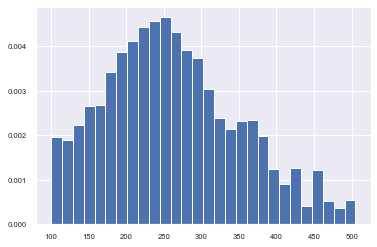

In [562]:
np.sqrt(wdf[(wdf.Annual_salary < wdf.Annual_salary.max()) & (wdf.Annual_salary > wdf.Annual_salary.min())].Annual_salary).hist(bins='scott', density=True);

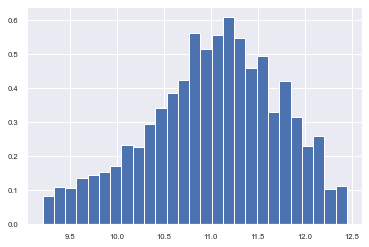

In [563]:
np.log(wdf[(wdf.Annual_salary < wdf.Annual_salary.max()) & (wdf.Annual_salary > wdf.Annual_salary.min())].Annual_salary).hist(bins='scott', density=True);

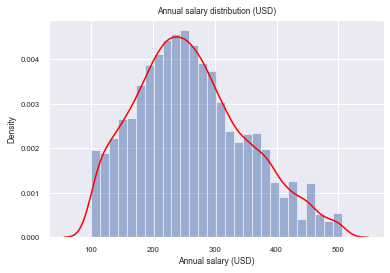

In [564]:
salaries = np.sqrt(wdf[(wdf.Annual_salary < wdf.Annual_salary.max()) & (wdf.Annual_salary > wdf.Annual_salary.min())].Annual_salary)

fig, ax = plt.subplots()

sns.kdeplot(salaries, ax=ax, fill=False, color='red')
salaries.hist(ax=ax, bins='scott', alpha=0.5, density=True)

plt.xlabel('Annual salary (USD)')
plt.ylabel('Density')
plt.title('Annual salary distribution (USD)')

plt.show()

- Job Title

In [565]:
# Let's see the unique values of the 'Job_title' column
devs_list = []

# Itera sobre cada valor en la columna 'DevType'
for dev_type in wdf['Job_title']:
    # Si el valor actual no es nulo
    if not pd.isnull(dev_type):
        # Itera sobre cada subvalor del valor actual de 'DevType'
        for dev_sub_type in dev_type.split(';'):
            # Si el subvalor actual no está en devs_list y no contiene 'Other (please specify):', lo agrega
            if dev_sub_type.strip() not in devs_list and 'Other (please specify):' not in dev_sub_type:
                devs_list.append(dev_sub_type.strip())

devs_list

['Developer, back-end',
 'DevOps specialist',
 'Developer, embedded applications or devices',
 'Cloud infrastructure engineer',
 'Developer, front-end',
 'Developer, full-stack',
 'Engineer, site reliability',
 'Database administrator',
 'Educator',
 'Engineering manager',
 'Security professional',
 'Developer, mobile',
 'Developer, desktop or enterprise applications',
 'Data scientist or machine learning specialist',
 'Engineer, data',
 'System administrator',
 'Designer',
 'Project manager',
 'Product manager',
 'Developer, QA or test',
 'Senior Executive (C-Suite, VP, etc.)',
 'Developer, game or graphics',
 'Scientist',
 'Data or business analyst',
 'Academic researcher',
 'Marketing or sales professional',
 'Blockchain',
 'Student']

In [566]:
# Let's keep the rows with AI/ML related fields

AI_ML_devs = ['Data scientist or machine learning specialist',
 'Engineer, data',
 'Data or business analyst',
 'Scientist']

def check_AI_ML_dev(row):
    if pd.isna(row['Job_title']) or row['Job_title'] == '':
        return False
    dev_types = row['Job_title'].split(';')
    for dev in AI_ML_devs:
        if dev in dev_types:
            return True
    return False

# Filtrar el DataFrame eliminando las filas donde check_AI_ML_dev es False
wdf = wdf[wdf.apply(check_AI_ML_dev, axis=1)]

wdf['DevType_len'] = wdf['Job_title'].apply(lambda x: len(x.split(';')))
wdf = wdf.loc[wdf['DevType_len'] <= 4]
wdf = wdf.drop('DevType_len', axis=1)

# Let's see how many rows we have left
print(wdf.shape[0])

860


C:\Users\fenan\AppData\Local\Temp\ipykernel_13128\1041447339.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wdf['DevType_len'] = wdf['Job_title'].apply(lambda x: len(x.split(';')))


In [567]:
wdf.Job_title.nunique()

302

We apply the following function to standardize and clean the "Job_title" column in the dataset. The function splits job titles, removes extra spaces, creates a list of unique titles, sorts them alphabetically, and then joins them back together with a consistent delimiter. By doing this, we ensure that the model treats job titles consistently, regardless of the order they appear in, which can lead to more accurate predictions. Also, it will 'Other (please specify):' from the options of Job titles


In [568]:
def clean_job_titles(job_title):
    job_list = job_title.split(';')
    job_list = [job.strip() for job in job_list]
    job_list = [job for job in job_list if job != 'Other (please specify):']
    unique_jobs = list(set(job_list))
    sorted_jobs = sorted(unique_jobs)
    return ';'.join(sorted_jobs)

wdf['Cleaned_Job_title'] = wdf['Job_title'].apply(clean_job_titles)
# Imprime las columnas 'Job_title' y 'Cleaned_Job_title' lado a lado
wdf[['Job_title', 'Cleaned_Job_title']].sample(20)


,Job_title,Cleaned_Job_title
8049,Academic researcher;Project manager;Scientist,Academic researcher;Project manager;Scientist
4542,"Engineer, data;Developer, back-end;Data or bus...","Data or business analyst;Developer, back-end;E..."
8312,Data scientist or machine learning specialist,Data scientist or machine learning specialist
8069,"Engineer, data","Engineer, data"
6030,Data or business analyst,Data or business analyst
6626,Scientist,Scientist
7106,"Engineer, data;Developer, back-end;Developer, ...","Developer, back-end;Developer, desktop or ente..."
501,Student;Academic researcher;Scientist,Academic researcher;Scientist;Student
3566,"Engineer, data;Developer, back-end","Developer, back-end;Engineer, data"
5054,Academic researcher;Data or business analyst;S...,Academic researcher;Data or business analyst;S...


In [569]:
# Actualizar la columna 'Job_title' con los valores de 'Cleaned_Job_title'
wdf['Job_title'] = wdf['Cleaned_Job_title']

# Eliminar la columna 'Cleaned_Job_title' del DataFrame
wdf.drop(columns=['Cleaned_Job_title'], inplace=True)

# Obtener todos los títulos de trabajo únicos
unique_job_titles = list(set(wdf['Job_title'].str.split(';', expand=True).stack()))

# Contar la cantidad de títulos de trabajo únicos
unique_job_titles_count = len(unique_job_titles)

# Imprimir la cantidad de títulos de trabajo únicos
print(unique_job_titles_count)
print(unique_job_titles)



28
['Developer, desktop or enterprise applications', 'Cloud infrastructure engineer', 'System administrator', 'DevOps specialist', 'Developer, full-stack', 'Developer, embedded applications or devices', 'Engineer, site reliability', 'Blockchain', 'Developer, QA or test', 'Engineer, data', 'Developer, mobile', 'Engineering manager', 'Developer, back-end', 'Data scientist or machine learning specialist', 'Developer, game or graphics', 'Educator', 'Product manager', 'Data or business analyst', 'Student', 'Scientist', 'Security professional', 'Database administrator', 'Academic researcher', 'Developer, front-end', 'Project manager', 'Senior Executive (C-Suite, VP, etc.)', 'Designer', 'Marketing or sales professional']


In [570]:
# Separa los títulos de trabajo y aplica one-hot encoding
job_title_dummies = wdf['Job_title'].str.get_dummies(sep=';')

# Une el DataFrame original (wdf) con el nuevo DataFrame (job_title_dummies)
wdf_extended = pd.concat([wdf, job_title_dummies], axis=1)

# Muestra las primeras filas del nuevo DataFrame
wdf_extended.head()


,Job_type,Remote_work,Coding_as_hobby,Education,Certifications,Job_title,Company_size,Country,Age,Gender,...,"Engineer, site reliability",Engineering manager,Marketing or sales professional,Product manager,Project manager,Scientist,Security professional,"Senior Executive (C-Suite, VP, etc.)",Student,System administrator
18,Full-time employed,hybrid,yes,Post grad,no,Data scientist or machine learning specialist;...,XL,Israel,25-34 years old,Man,...,0,0,0,0,0,0,0,0,0,0
32,Full-time employed,hybrid,yes,Bachelor's degree,yes,"Developer, back-end;Engineer, data",M,Israel,45-54 years old,Man,...,0,0,0,0,0,0,0,0,0,0
41,Full-time employed,hybrid,yes,Less than a Bachelor's,no,"Developer, back-end;Engineer, data",M,Israel,25-34 years old,Man,...,0,0,0,0,0,0,0,0,0,0
48,Part-time employed,hybrid,yes,Bachelor's degree,no,Data scientist or machine learning specialist,L,Israel,18-24 years old,Man,...,0,0,0,0,0,0,0,0,0,0
112,Full-time employed,hybrid,yes,Master's degree,no,Data or business analyst,S,Netherlands,35-44 years old,Man,...,0,0,0,0,0,0,0,0,0,0


In [571]:
import numpy as np
import pandas as pd
from sklearn.metrics import jaccard_score

# Asumiendo que df_encoded es el DataFrame después de aplicar one-hot encoding
columnas = job_title_dummies.columns

# Crear una matriz vacía de similitud
similitud_jaccard = np.zeros((len(columnas), len(columnas)))

# Calcular la correlación de Jaccard entre cada par de columnas
for i in range(len(columnas)):
    for j in range(len(columnas)):
        similitud_jaccard[i, j] = jaccard_score(job_title_dummies[columnas[i]], job_title_dummies[columnas[j]])

# Convertir la matriz de similitud en un DataFrame
df_similitud_jaccard = pd.DataFrame(similitud_jaccard, index=columnas, columns=columnas)


In [572]:
df_similitud_jaccard

,Academic researcher,Blockchain,Cloud infrastructure engineer,Data or business analyst,Data scientist or machine learning specialist,Database administrator,Designer,DevOps specialist,"Developer, QA or test","Developer, back-end",...,"Engineer, site reliability",Engineering manager,Marketing or sales professional,Product manager,Project manager,Scientist,Security professional,"Senior Executive (C-Suite, VP, etc.)",Student,System administrator
Academic researcher,1.000000,0.015152,0.005464,0.021021,0.132701,0.016575,0.000000,0.006173,0.000000,0.019553,...,0.000000,0.000000,0.000000,0.000000,0.012903,0.464115,0.014599,0.000000,0.082707,0.013072
Blockchain,0.015152,1.000000,0.000000,0.000000,0.005682,0.016949,0.000000,0.000000,0.000000,0.004167,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.016760,0.153846,0.000000,0.052632,0.000000
Cloud infrastructure engineer,0.005464,0.000000,1.000000,0.055556,0.027990,0.067961,0.029851,0.112500,0.000000,0.098113,...,0.050847,0.024096,0.000000,0.000000,0.000000,0.004329,0.000000,0.000000,0.000000,0.012500
Data or business analyst,0.021021,0.000000,0.055556,1.000000,0.106719,0.117647,0.027397,0.025105,0.027397,0.140306,...,0.000000,0.025532,0.014218,0.023474,0.066964,0.010417,0.009132,0.009302,0.004444,0.044053
Data scientist or machine learning specialist,0.132701,0.005682,0.027990,0.106719,1.000000,0.017632,0.005540,0.021333,0.008333,0.125000,...,0.000000,0.035519,0.000000,0.005650,0.021680,0.109705,0.005602,0.008523,0.005525,0.008065
Database administrator,0.016575,0.016949,0.067961,0.117647,0.017632,1.000000,0.045455,0.011364,0.014706,0.046763,...,0.016393,0.011905,0.000000,0.000000,0.012195,0.008696,0.015625,0.000000,0.000000,0.094595
Designer,0.000000,0.000000,0.029851,0.027397,0.005540,0.045455,1.000000,0.000000,0.000000,0.020408,...,0.000000,0.023256,0.000000,0.050000,0.000000,0.010582,0.090909,0.052632,0.000000,0.025641
DevOps specialist,0.006173,0.000000,0.112500,0.025105,0.021333,0.011364,0.000000,1.000000,0.066667,0.050584,...,0.025000,0.032258,0.000000,0.025000,0.000000,0.014423,0.023256,0.025641,0.000000,0.034483
"Developer, QA or test",0.000000,0.000000,0.000000,0.027397,0.008333,0.014706,0.000000,0.066667,1.000000,0.016260,...,0.000000,0.000000,0.000000,0.000000,0.024390,0.005263,0.000000,0.000000,0.000000,0.000000
"Developer, back-end",0.019553,0.004167,0.098113,0.140306,0.125000,0.046763,0.020408,0.050584,0.016260,1.000000,...,0.012500,0.031008,0.000000,0.004132,0.027237,0.050891,0.012346,0.004149,0.000000,0.023438


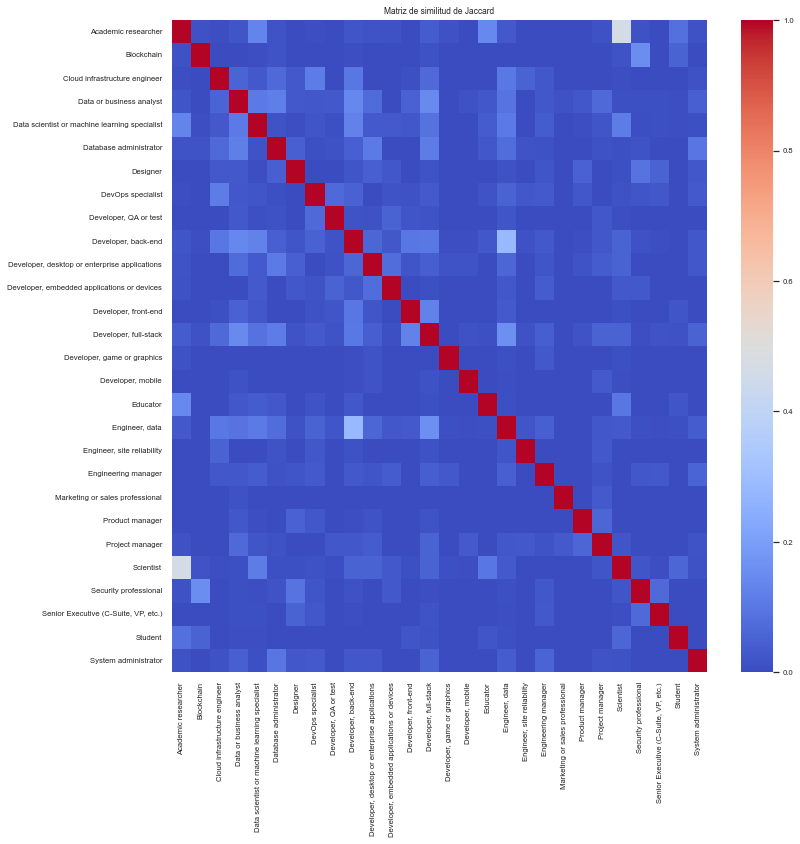

In [573]:
# Asumiendo que df_similitud_jaccard es el DataFrame que contiene la matriz de similitud de Jaccard
plt.figure(figsize=(12, 12))  # Ajusta el tamaño de la figura (ancho, alto) en pulgadas
sns.heatmap(df_similitud_jaccard, annot=False, cmap="coolwarm", vmin=0, vmax=1)

plt.title("Matriz de similitud de Jaccard")
plt.show()


In [574]:
# Another similar approach: Splitting Job_Title using CountVectorizer
'''import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Suponiendo que tu DataFrame se llama wdf y tiene una columna llamada 'Job_title'
job_titles = wdf['Job_title']

# Creamos una instancia de CountVectorizer con el patrón de token adecuado para separar los títulos de trabajo
vectorizer = CountVectorizer(token_pattern=r'[^;]+')

# Ajustamos y transformamos la columna 'Job_title'
job_title_vectors = vectorizer.fit_transform(job_titles)

# Muestra el vocabulario
print(vectorizer.vocabulary_)'''

"import pandas as pd\nfrom sklearn.feature_extraction.text import CountVectorizer\n\n# Suponiendo que tu DataFrame se llama wdf y tiene una columna llamada 'Job_title'\njob_titles = wdf['Job_title']\n\n# Creamos una instancia de CountVectorizer con el patrón de token adecuado para separar los títulos de trabajo\nvectorizer = CountVectorizer(token_pattern=r'[^;]+')\n\n# Ajustamos y transformamos la columna 'Job_title'\njob_title_vectors = vectorizer.fit_transform(job_titles)\n\n# Muestra el vocabulario\nprint(vectorizer.vocabulary_)"

In [575]:
'''job_title_vectors'''

'job_title_vectors'

### Missing values

In [576]:
wdf_extended.isna().sum() # The 868 missing values in the 'Experience' account for 30% of data, we should impute them

Job_type                                           0
Remote_work                                        0
Coding_as_hobby                                    0
Education                                          0
Certifications                                     0
Job_title                                          0
Company_size                                      14
Country                                            0
Age                                                1
Gender                                             2
Sexual_orientation                                23
Ethnicity                                         10
Physical_disability                                0
Mental_disability                                  0
Work_experience                                  266
Coding_experience                                  3
Annual_salary                                      0
Academic researcher                                0
Blockchain                                    

Imputation strategies for each column with missing values:

1. **Company_size (47 missing values):**

Since Company_size is a categorical variable and has a relatively small number of missing values, you can use the mode (the most common value) to impute the missing values.




In [577]:
wdf_extended['Company_size'].fillna(wdf_extended['Company_size'].mode()[0], inplace=True)

In [578]:
# You could also use the following code to impute the missing values but there is no mode for all the combinations of Job_title and Country

# wdf_extended['Company_size'] = wdf_extended.groupby(['Job_title', 'Country'])['Company_size'].apply(lambda x: x.fillna(x.mode().iloc[0]))

2. **Age (9 missing values):** 

`Age` have only 9 missing values, so we will drop them.

In [579]:
# we will drop the rows with missing values in the 'Age' column

wdf_extended.dropna(subset=['Age'], inplace=True)

3. **Coding Experience (9 missing values):** 

It also has only 9 missing values, so same process as `Age`

In [580]:
wdf_extended.isnull().sum()

Job_type                                           0
Remote_work                                        0
Coding_as_hobby                                    0
Education                                          0
Certifications                                     0
Job_title                                          0
Company_size                                       0
Country                                            0
Age                                                0
Gender                                             2
Sexual_orientation                                22
Ethnicity                                         10
Physical_disability                                0
Mental_disability                                  0
Work_experience                                  265
Coding_experience                                  3
Annual_salary                                      0
Academic researcher                                0
Blockchain                                    

In [581]:
# we will drop the rows with missing values in the 'Coding_experience' column

wdf_extended.dropna(subset=['Coding_experience'], inplace=True)

In [582]:
wdf_extended.Coding_experience.unique()

array(['4', '20', '5', '2', 'Less than 1 year', '10', '7', '6', '8', '1',
       '13', '34', '16', '26', '11', '9', '35', '30', '14', '3', '21',
       '15', '18', '31', '24', '12', '25', '22', '23', '32', '27', '17',
       '36', '28', 'More than 50 years', '45', '29', '42', '37'],
      dtype=object)

In [583]:
wdf_extended['Coding_experience'] = pd.to_numeric(wdf_extended['Coding_experience'].replace({'Less than 1 year': 0.5, 'More than 50 years': 51}), errors='coerce')
wdf_extended.Coding_experience.unique()

array([ 4. , 20. ,  5. ,  2. ,  0.5, 10. ,  7. ,  6. ,  8. ,  1. , 13. ,
       34. , 16. , 26. , 11. ,  9. , 35. , 30. , 14. ,  3. , 21. , 15. ,
       18. , 31. , 24. , 12. , 25. , 22. , 23. , 32. , 27. , 17. , 36. ,
       28. , 51. , 45. , 29. , 42. , 37. ])

3. **Gender (16 missing values):** 

`Gender` is a categorical variable, and you can use the mode grouped by `Job_title` or `Country`, assuming that these features may have an influence on the gender.



In [584]:
wdf_extended['Gender'] = wdf_extended.groupby('Country')['Gender'].apply(lambda x: x.fillna(x.mode().iloc[0])) # with Job_title and Country there's no mode

4. **Sexual_orientation (101 missing values):** 

Since `Sexual_orientation` is a categorical variable and has a significant number of missing values, you can create a new category called "Unknown" to represent the missing values.



In [585]:
wdf_extended['Sexual_orientation'].fillna('Unknown', inplace=True)
wdf_extended['Sexual_orientation'].unique()

array(['Straight / Heterosexual', 'Bisexual', 'Unknown',
       'Prefer not to say', 'Gay or Lesbian', 'Queer'], dtype=object)

5. **Ethnicity (44 missing values):** 

`Ethnicity` is a categorical variable, and you can use the mode grouped by `Country`, assuming that the country of origin may have an influence on the ethnicity.


In [586]:
wdf_extended['Ethnicity'] = wdf_extended.groupby('Country')['Ethnicity'].apply(lambda x: x.fillna(x.mode().iloc[0]))

IndexError: single positional indexer is out-of-bounds


6. **Experience (868 missing values):** 

Since `Experience` is a numeric variable and has a significant number of missing values (1/3 of the total rows), I recommend using a more advanced approach like KNN Imputer. KNN Imputer uses the k-nearest neighbors to estimate the missing values.

In [ ]:
wdf_before_kNNImputer = wdf_extended.copy()

In [ ]:
wdf_before_kNNImputer.shape

(543, 45)

In [ ]:
wdf_before_kNNImputer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543 entries, 1 to 6673
Data columns (total 45 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Job_type                                       543 non-null    object 
 1   Remote_work                                    543 non-null    object 
 2   Coding_as_hobby                                543 non-null    object 
 3   Education                                      543 non-null    object 
 4   Certifications                                 543 non-null    object 
 5   Job_title                                      543 non-null    object 
 6   Company_size                                   543 non-null    object 
 7   Country                                        543 non-null    object 
 8   Age                                            543 non-null    object 
 9   Gender                                         543 no

In [ ]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import KNNImputer

# Definir las columnas ordinales y el orden
ordinal_columns = ['Education', 'Company_size', 'Age', 'Coding_as_hobby', 'Certifications']
ordinal_categories = [
    ['Less than a Bachelor\'s', 'Bachelor\'s degree', 'Master\'s degree', 'Post grad'],
    ['XS', 'S', 'M', 'L', 'XL'],
    ['Prefer not to say','Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'],
    ['no', 'yes'],
    ['no', 'yes']
]

# Definir las columnas one-hot
onehot_columns = ['Job_type', 'Remote_work', 'Gender', 'Sexual_orientation', 'Ethnicity', 'Physical_disability', 'Mental_disability']

# Crear las transformaciones
ordinal_transformer = OrdinalEncoder(categories=ordinal_categories)
onehot_transformer = OneHotEncoder(sparse=False)

# Ajustar y transformar las columnas ordinales
wdf_extended_ordinal_transformed = ordinal_transformer.fit_transform(wdf_extended[ordinal_columns])

# Ajustar y transformar las columnas one-hot
wdf_extended_onehot_transformed = onehot_transformer.fit_transform(wdf_extended[onehot_columns])

# Concatenar las columnas transformadas
wdf_extended_transformed = np.hstack([wdf_extended_ordinal_transformed, wdf_extended_onehot_transformed])

# Crear un KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)

# Imputar los valores faltantes en la columna 'Experience' utilizando las características transformadas
experience_transformed = knn_imputer.fit_transform(np.hstack([wdf_extended_transformed, wdf_extended['Work_experience'].values.reshape(-1, 1)]))

# Redondear los valores imputados a 1 decimal
experience_imputed_rounded = np.round(experience_transformed[:, -1], 1)

# Reemplazar la columna 'Experience' con los valores imputados redondeados
wdf_extended['Work_experience'] = experience_imputed_rounded

# Revertir las transformaciones aplicadas a las columnas one-hot y reemplazar los valores en el DataFrame original
wdf_extended.loc[:, onehot_columns] = onehot_transformer.inverse_transform(wdf_extended_onehot_transformed)

#wdf_extended.reset_index(drop=True, inplace=True)

# Corregir la comparación
comparison = pd.DataFrame({'Original': wdf_before_kNNImputer['Work_experience'], 'Imputed': wdf_extended['Work_experience']})
comparison['Difference'] = comparison.apply(lambda row: pd.isna(row['Original']) and not pd.isna(row['Imputed']), axis=1)

imputed_values = comparison[comparison['Difference']]

num_imputed_values = len(imputed_values)
unique_imputed_values = imputed_values['Imputed'].nunique()

print(f"Number of imputed values: {num_imputed_values}")
print(f"Number of unique imputed values: {unique_imputed_values}")

Number of imputed values: 163
Number of unique imputed values: 72


In [ ]:
# Makes sense?:
wdf_extended.loc[imputed_values.index, ['Age','Work_experience']].sample(20)

,Age,Work_experience
1870,35-44 years old,9.4
4867,35-44 years old,15.0
4665,18-24 years old,3.8
1305,35-44 years old,10.6
1647,35-44 years old,8.0
2433,45-54 years old,12.0
248,18-24 years old,7.8
262,25-34 years old,8.8
5339,65 years or older,29.0
2456,45-54 years old,21.8


In [ ]:
wdf_extended.isna().any().sum()

0

In [ ]:
wdf_extended.Annual_salary.info()

<class 'pandas.core.series.Series'>
Int64Index: 543 entries, 1 to 6673
Series name: Annual_salary
Non-Null Count  Dtype  
--------------  -----  
543 non-null    float64
dtypes: float64(1)
memory usage: 24.6 KB


### To see how the encoded dataset looks like

In [ ]:
# Crear un DataFrame para las columnas ordinales transformadas
wdf_extended_ordinal_transformed_df = pd.DataFrame(wdf_extended_ordinal_transformed, columns=ordinal_columns)

# Obtener los nombres de las nuevas columnas generadas por el OneHotEncoder
onehot_transformer_columns = onehot_transformer.get_feature_names_out(onehot_columns)

# Crear un DataFrame para las columnas one-hot transformadas
wdf_extended_onehot_transformed_df = pd.DataFrame(wdf_extended_onehot_transformed, columns=onehot_transformer_columns)

# Restablecer los índices de todos los DataFrames
wdf_extended_ordinal_transformed_df.reset_index(drop=True, inplace=True)
wdf_extended_onehot_transformed_df.reset_index(drop=True, inplace=True)
wdf_extended['Work_experience'].reset_index(drop=True, inplace=True)
wdf_extended['Coding_experience'].reset_index(drop=True, inplace=True)
wdf_extended['Country'].reset_index(drop=True, inplace=True)

# Añadir la siguiente línea después de restablecer los índices de todos los DataFrames
wdf_extended['Annual_salary'].reset_index(drop=True, inplace=True)
job_title_dummies.reset_index(drop=True, inplace=True)

# Concatenar los DataFrames transformados y la columna 'Experience'
wdf_extended_full_encoded = pd.concat([wdf_extended_ordinal_transformed_df, wdf_extended_onehot_transformed_df, job_title_dummies, 
                                           wdf_extended['Work_experience'],wdf_extended['Coding_experience'],
                                           wdf_extended['Annual_salary'], wdf_extended['Country']], axis=1)

# Job_title_dummies has 22 rows more, consequently, some NANs were generated. Let's drop all NAN rows:

wdf_extended_full_encoded.dropna(inplace=True)

# Verificar la forma del DataFrame transformado completo
print(wdf_extended_full_encoded.shape)

(543, 76)


In [ ]:
wdf_before_kNNImputer.Coding_experience.head()

1     7.0
4     5.0
16    0.5
23    6.0
30    3.0
Name: Coding_experience, dtype: float64

In [ ]:
wdf_extended_full_encoded.Coding_experience.head()

0    7.0
1    5.0
2    0.5
3    6.0
4    3.0
Name: Coding_experience, dtype: float64

## Save the model

In [ ]:
wdf_extended_full_encoded.isnull().sum()

Education               0
Company_size            0
Age                     0
Coding_as_hobby         0
Certifications          0
                       ..
System administrator    0
Work_experience         0
Coding_experience       0
Annual_salary           0
Country                 0
Length: 76, dtype: int64

In [ ]:
import os

# ...

clean_and_encoded_df = wdf_extended_full_encoded.copy()
clean_and_encoded_df.to_csv('clean_test_df.csv', index=False)

# Guardar en la carpeta Baseline_Models
baseline_models_path = os.path.join('..', 'Baseline_Models', 'clean_test_df.csv')
clean_and_encoded_df.to_csv(baseline_models_path, index=False)


In [ ]:
pd.read_csv('clean_test_df.csv').sample(10)

,Education,Company_size,Age,Coding_as_hobby,Certifications,Job_type_Full-time employed,Job_type_Independent contractor / Freelancer / Self-employed,Job_type_Other,Job_type_Part-time employed,Remote_work_hybrid,...,Project manager,Scientist,Security professional,"Senior Executive (C-Suite, VP, etc.)",Student,System administrator,Work_experience,Coding_experience,Annual_salary,Country
120,2.0,3.0,5.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,30.0,1.0,90000.0,USA
422,2.0,4.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,5.0,2.0,33912.0,Finland
339,1.0,4.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,15.0,15.0,54168.0,India
63,2.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0,1,0,0,1,0,1.0,3.0,27000.0,USA
210,3.0,4.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,13.0,13.0,94700.0,Germany
30,3.0,4.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,11.0,20.0,125639.0,UK & Northern Ireland
22,2.0,1.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,14.0,3.0,75384.0,UK & Northern Ireland
13,2.0,1.0,4.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,11.0,11.0,70380.0,Netherlands
495,3.0,3.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,20.0,22.0,85591.0,China
258,3.0,4.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0,1,0,0,0,0,6.6,4.0,69318.0,Germany


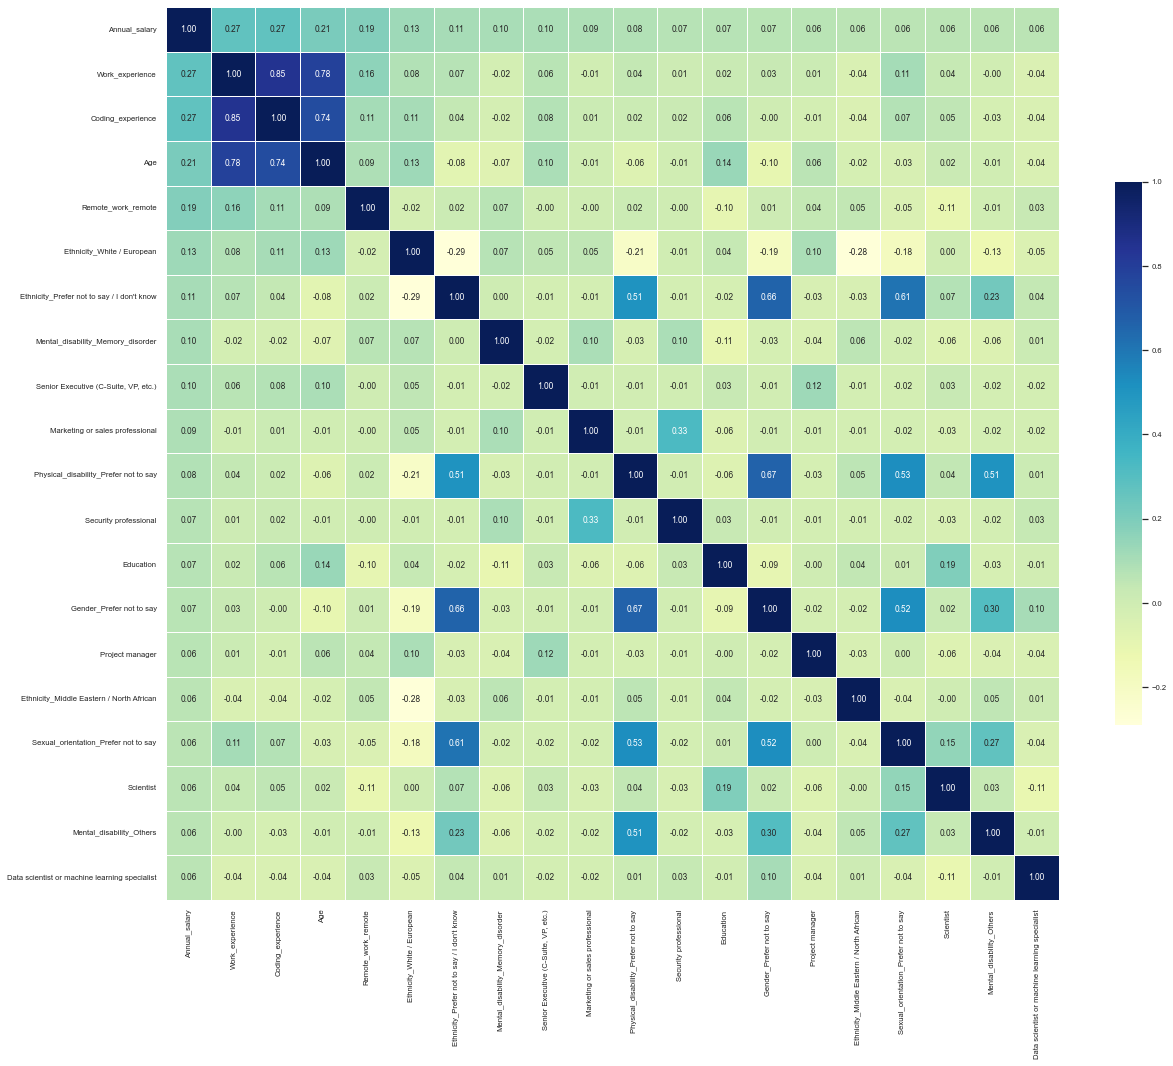

In [ ]:
# Calculate the correlation matrix
corr_matrix = wdf_extended_full_encoded.corr()

# Set the threshold for selecting the top n features
n = 20

# Select the top n most correlated features
top_corr_features = corr_matrix.nlargest(n, 'Annual_salary')['Annual_salary'].index

# Calculate the correlation matrix for the top n features
top_corr_matrix = wdf_extended_full_encoded[top_corr_features].corr()

# Create a heatmap of the correlation matrix
sns.set(font_scale=0.7)
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(top_corr_matrix, cmap="YlGnBu", annot=True, fmt=".2f", square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()


In [ ]:
pd.read_csv('clean_test_df.csv').shape

(543, 76)

### Recovering previous dataset for some plotting


One-hot encoding can be used to handle categorical features, but it can make the data too complex to analyze. One-hot encoding creates multiple binary features for each possible option in a categorical feature. This can lead to a high number of features, making it difficult to interpret the data. Therefore, another method is needed to gain insights from the data.

Let's recover the clean dataset of before encoding. We can calculate Cramer's V correlation, which allows us to guess correlation among categroical features

- We don't need the already encoded Job_titles
- We do need the original Job_title column though

## PLOT IDEAS:
BOXPLOTS: 

- _Boxplots of salaries as a funcion of experience years_(Martin2018)
- _Boxplots of salaries as a funcion of education_ (Martin2018)